# Universidad del Valle de Guatemala
# Inteligencia Artificial - CC3045
## Authors:
## Julio Herrera - 19402
## Juan Pablo Pineda - 19087
## Diego Crespo - 19541

### Dataset:
#### games_of_all_time.csv - Games of All Time from Metacritic - https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic?resource=download
#### vgsales.csv - Video Game Sales - https://www.kaggle.com/datasets/gregorut/videogamesales

In [31]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import random

In [2]:
games_meta = pd.read_csv('games_of_all_time.csv')
games_sales = pd.read_csv('vgsales.csv')

# Juntando datasets

Removiendo variables que no se usarán

In [3]:
games_meta = games_meta.drop(columns=['description', 'url', 'type', 'rating'])
games_sales = games_sales.drop(columns=['Rank', 'Genre', 'Publisher'])

Renombrando variables para facilitar su lectura

In [4]:
games_meta.columns = ['name', 'meta_score', 'user_score', 'platform', 'developer', 'genre']
games_sales.columns = ['name', 'platform', 'year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Limpiando datos

In [5]:
# remove the 'HD' at the end of the name on every row
games_sales['name'] = games_sales['name'].str.replace(' HD', '')
games_sales['name'] = games_sales['name'].str.replace(' 3D', '')
games_meta['name'] = games_meta['name'].str.replace(' HD', '')
games_meta['name'] = games_meta['name'].str.replace(' 3D', '')

# create new rows by separating the platforms list
games_meta['platform'] = games_meta['platform'].apply(literal_eval)
games_meta = games_meta.explode('platform')

# drop columns with na value in genre and developer column
games_meta = games_meta.dropna(subset=['genre'])
games_meta = games_meta.dropna(subset=['developer'])

# create new rows by separating the genre list
games_meta['genre'] = games_meta['genre'].apply(literal_eval)
games_meta = games_meta.explode('genre')

# if platform is '3ds' change to '3DS' without using replace
games_meta['platform'] = games_meta['platform'].apply(lambda x: '3DS' if x == '3ds' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'N64' if x == 'nintendo-64' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'XB' if x == 'xbox' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'X360' if x == 'xbox-360' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'XOne' if x == 'xbox-one' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PS' if x == 'playstation' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PS2' if x == 'playstation-2' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PS3' if x == 'playstation-3' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PS4' if x == 'playstation-4' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PSV' if x == 'playstation-vita' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PSP' if x == 'psp' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'PC' if x == 'pc' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'Wii' if x == 'wii' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'WiiU' if x == 'wii-u' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'GC' if x == 'gamecube' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'DS' if x == 'ds' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'DC' if x == 'dreamcast' else x)
games_meta['platform'] = games_meta['platform'].apply(lambda x: 'GBA' if x == 'game-boy-advance' else x)

In [6]:
# Mergeando ambos datasets
games_meta_sales = pd.merge(games_meta, games_sales, on=['name', 'platform'])
games_meta_sales

,name,meta_score,user_score,platform,developer,genre,year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,N64,Nintendo,Action Adventure,1998.0,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,99.0,91.0,N64,Nintendo,Fantasy,1998.0,4.10,1.89,1.45,0.16,7.60
2,Super Mario Galaxy,97.0,91.0,Wii,Nintendo,Action,2007.0,6.16,3.40,1.20,0.76,11.52
3,Super Mario Galaxy,97.0,91.0,Wii,Nintendo,Platformer,2007.0,6.16,3.40,1.20,0.76,11.52
4,Super Mario Galaxy,97.0,91.0,Wii,Nintendo,3D,2007.0,6.16,3.40,1.20,0.76,11.52
...,...,...,...,...,...,...,...,...,...,...,...,...
15754,htoL#NiQ: The Firefly Diary,58.0,75.0,PSV,Nippon Ichi Software,General,2014.0,0.00,0.00,0.01,0.00,0.01
15755,htoL#NiQ: The Firefly Diary,58.0,75.0,PSV,Nippon Ichi Software,Platformer,2014.0,0.00,0.00,0.01,0.00,0.01
15756,htoL#NiQ: The Firefly Diary,58.0,75.0,PSV,Nippon Ichi Software,2D,2014.0,0.00,0.00,0.01,0.00,0.01
15757,uDraw Studio,71.0,71.0,Wii,THQ,Miscellaneous,2010.0,1.67,0.58,0.00,0.20,2.46


Categorizando

In [7]:
# Categorise values in platform column
platforms = games_meta_sales['platform'].values
platforms = np.unique(platforms)
platforms_dict = {}
for i in range(len(platforms)):
    platforms_dict[platforms[i]] = i
games_meta_sales['platform'] = games_meta_sales['platform'].apply(lambda x: platforms_dict[x])

In [8]:
# Categorise values in genre column
genres = games_meta_sales['genre'].values
genres = np.unique(genres)
genres_dict = {}
for i in range(len(genres)):
    genres_dict[genres[i]] = i
games_meta_sales['genre'] = games_meta_sales['genre'].apply(lambda x: genres_dict[x])

In [9]:
# Categorise values in developer column
developer = games_meta_sales['developer'].values
developer_dict = np.unique(developer)
developer_dict = {}
for i in range(len(developer)):
    developer_dict[developer[i]] = i
games_meta_sales['developer'] = games_meta_sales['developer'].apply(lambda x: developer_dict[x])
games_meta_sales

,name,meta_score,user_score,platform,developer,genre,year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,5,15445,4,1998.0,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,99.0,91.0,5,15445,40,1998.0,4.10,1.89,1.45,0.16,7.60
2,Super Mario Galaxy,97.0,91.0,13,15445,3,2007.0,6.16,3.40,1.20,0.76,11.52
3,Super Mario Galaxy,97.0,91.0,13,15445,96,2007.0,6.16,3.40,1.20,0.76,11.52
4,Super Mario Galaxy,97.0,91.0,13,15445,1,2007.0,6.16,3.40,1.20,0.76,11.52
...,...,...,...,...,...,...,...,...,...,...,...,...
15754,htoL#NiQ: The Firefly Diary,58.0,75.0,12,15756,51,2014.0,0.00,0.00,0.01,0.00,0.01
15755,htoL#NiQ: The Firefly Diary,58.0,75.0,12,15756,96,2014.0,0.00,0.00,0.01,0.00,0.01
15756,htoL#NiQ: The Firefly Diary,58.0,75.0,12,15756,0,2014.0,0.00,0.00,0.01,0.00,0.01
15757,uDraw Studio,71.0,71.0,13,15758,77,2010.0,1.67,0.58,0.00,0.20,2.46


# Analisis de variables

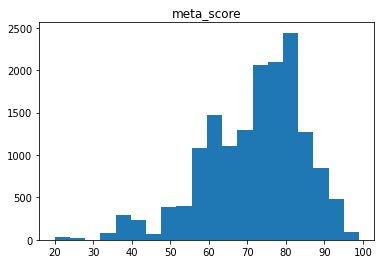

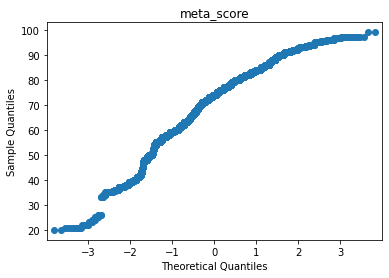

meta_score
skew:  -0.7669393512472223
kurtosis:  0.5792470774619942




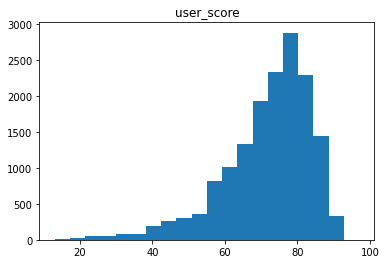

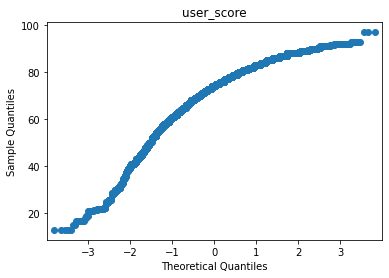

user_score
skew:  -1.2494579041396128
kurtosis:  2.059394181852421




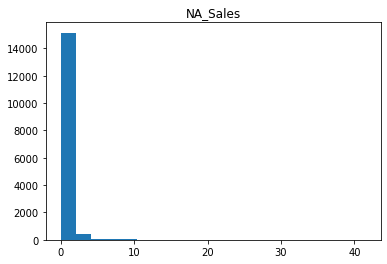

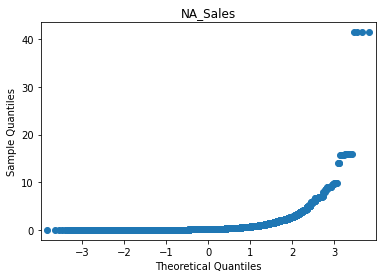

NA_Sales
skew:  15.786646863011436
kurtosis:  466.70233903162466




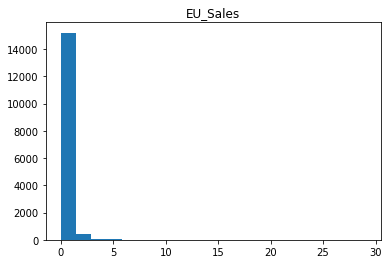

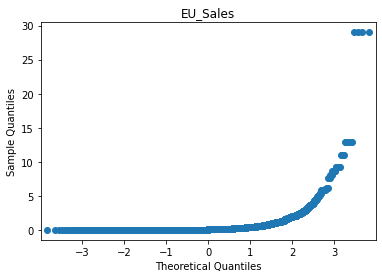

EU_Sales
skew:  15.53930890565928
kurtosis:  430.4090345161602




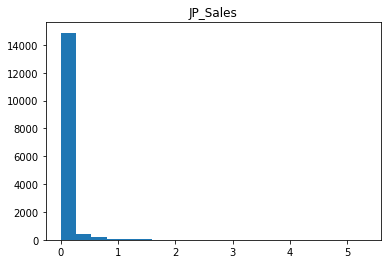

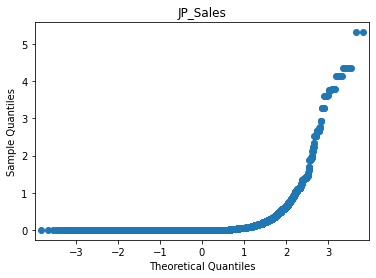

JP_Sales
skew:  9.377789730261355
kurtosis:  114.1691797683624




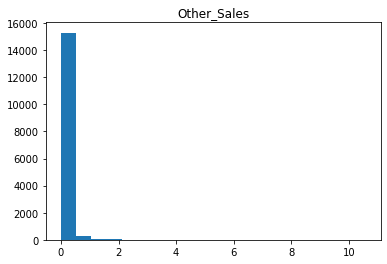

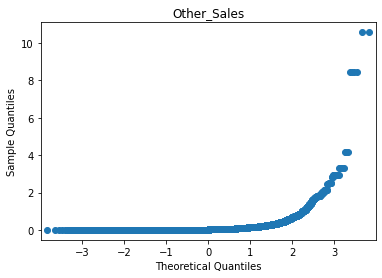

Other_Sales
skew:  15.787549204685524
kurtosis:  424.972883930962




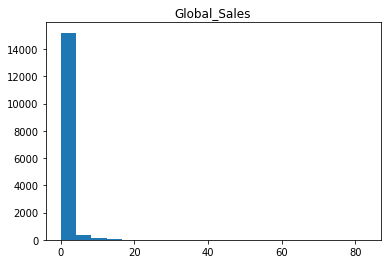

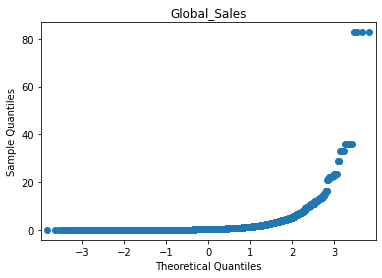

Global_Sales
skew:  15.971347115670138
kurtosis:  456.5613428265268




In [10]:
# histogram
cuantitatives = ['meta_score', 'user_score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i in cuantitatives:
    plt.hist(games_meta_sales[i], bins=20)
    plt.title(i)
    plt.show()
    qqplot(games_meta_sales[i])
    plt.title(i)
    plt.show()
    print(i)
    print('skew: ', games_meta_sales[i].skew())
    print('kurtosis: ', games_meta_sales[i].kurtosis())
    print('\n')

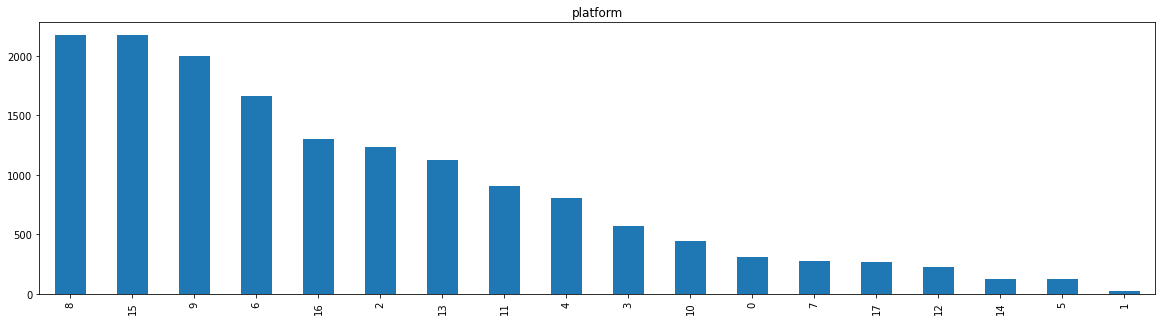

{'3DS': 0, 'DC': 1, 'DS': 2, 'GBA': 3, 'GC': 4, 'N64': 5, 'PC': 6, 'PS': 7, 'PS2': 8, 'PS3': 9, 'PS4': 10, 'PSP': 11, 'PSV': 12, 'Wii': 13, 'WiiU': 14, 'X360': 15, 'XB': 16, 'XOne': 17}


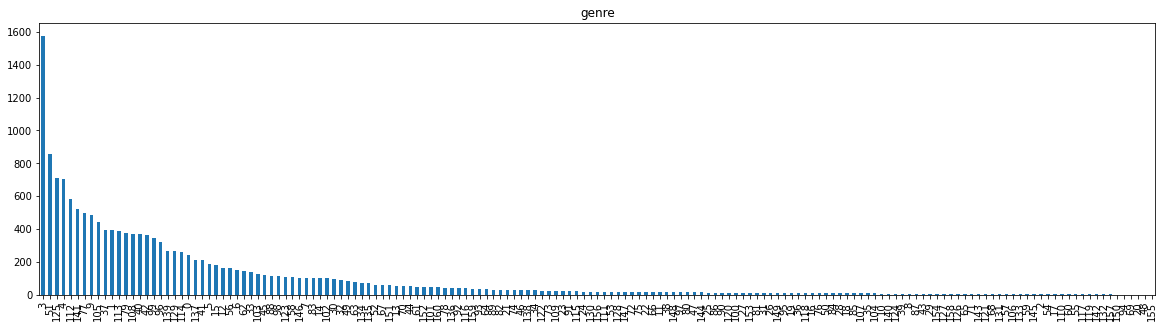

{'2D': 0, '3D': 1, '4X': 2, 'Action': 3, 'Action Adventure': 4, 'Action RPG': 5, 'Adventure': 6, 'Alternative': 7, 'Application': 8, 'Arcade': 9, 'Artillery': 10, 'Athletics': 11, 'Automobile': 12, 'Baseball': 13, 'Basketball': 14, "Beat-'Em-Up": 15, 'Biking': 16, 'Billiards': 17, 'Board / Card Game': 18, 'Board Games': 19, 'Bowling': 20, 'Boxing': 21, 'Boxing / Martial Arts': 22, 'Breeding/Constructing': 23, 'Business / Tycoon': 24, 'Car Combat': 25, 'Card Battle': 26, 'Career': 27, 'City Building': 28, 'Civilian': 29, 'Combat': 30, 'Command': 31, 'Compilation': 32, 'Console-style RPG': 33, 'Dancing': 34, 'Defense': 35, 'Demolition Derby': 36, 'Driving': 37, 'Edutainment': 38, 'Exercise / Fitness': 39, 'Fantasy': 40, 'Fighting': 41, 'First-Person': 42, 'Fishing': 43, 'Flight': 44, 'Football': 45, 'Formula One': 46, 'Futuristic': 47, 'Futuristic Sub': 48, 'GT / Street': 49, 'Gambling': 50, 'General': 51, 'Golf': 52, 'Government': 53, 'Helicopter': 54, 'Hidden Object': 55, 'Historic': 5

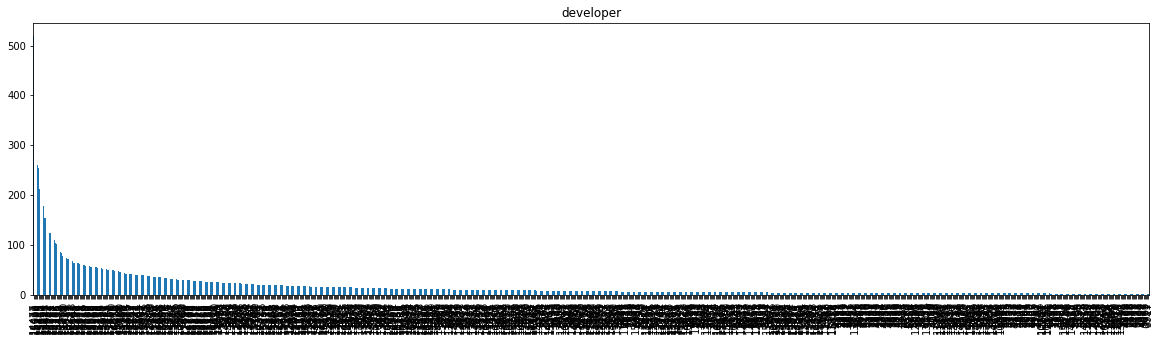

{'Nintendo': 15445, 'Nintendo EAD Tokyo ': 7, 'Retro Studios': 7090, 'Bungie Software': 8707, 'Visual Concepts': 11160, 'Naughty Dog': 8996, 'Namco': 13657, 'Polyphony Digital': 8440, 'KCEJ': 10159, 'Capcom': 15100, 'GREZZO': 14046, 'SquareSoft': 8083, 'Epic Games': 15122, 'Team Ninja': 11412, 'Blizzard Entertainment': 15555, 'Aspect': 11210, 'Kojima Productions': 10181, 'Firaxis Games': 15660, 'Sega AM2': 15217, 'Game Arts': 12035, 'Relic': 15393, 'SCE Santa Monica': 8406, 'Atlus': 14893, 'KCET': 15527, 'Overworks': 12739, 'Sega': 15244, 'Intelligent Systems': 15403, 'EA Sports': 14477, 'From Software': 11498, 'Silicon Knights': 15614, 'Microsoft Game Studios': 11000, 'Square Enix': 14022, 'HAL Labs': 9200, 'Creative Assembly': 14852, 'Turn 10': 8203, 'Neversoft Entertainment': 14795, 'Ensemble Studios': 5148, 'TOSE': 15063, 'Monolith Soft': 2267, 'Rare Ltd.': 11609, 'Bluepoint Games': 15104, 'Arkane Studios': 11756, 'Media Molecule': 13674, 'Harmonix Music Systems': 13796, '1C': 9925

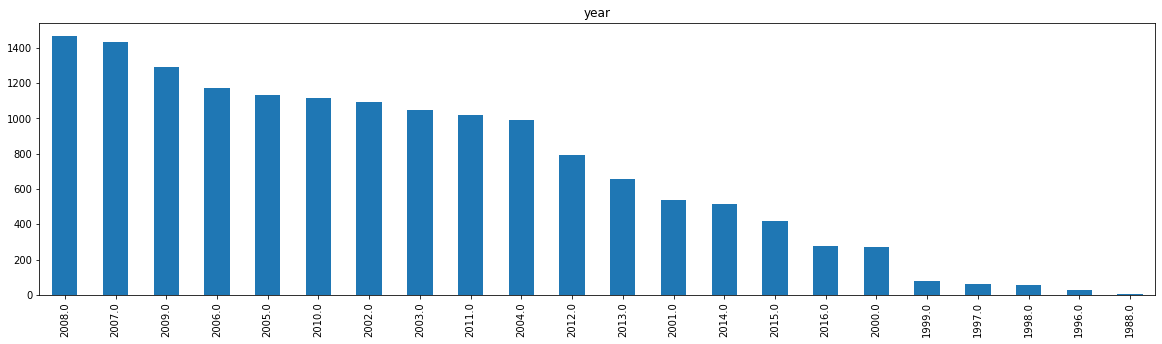

In [11]:
# frequency bar plot
cualitative = ['platform', 'genre', 'developer', 'year']
for i in cualitative:
    plt.figure(figsize=(20, 5))
    games_meta_sales[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    games_meta_sales[i].describe()
    if i == 'platform':
        print(platforms_dict)
    elif i == 'genre':
        print(genres_dict)
    elif i == 'developer':
        print(developer_dict)

# Aplicando modelo de RNA

Se añade una columna para referenciar al año en el que se calcularon las ventas del dataset (2020)

In [12]:
games_meta_sales['time_on_market'] = 2020 - games_meta_sales['year']

In [13]:
# Y is sales of different regions
Y = games_meta_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].values
Y

array([[4.100e+00, 1.890e+00, 1.450e+00, 1.600e-01, 7.600e+00],
       [4.100e+00, 1.890e+00, 1.450e+00, 1.600e-01, 7.600e+00],
       [6.160e+00, 3.400e+00, 1.200e+00, 7.600e-01, 1.152e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e-02, 0.000e+00, 1.000e-02],
       [1.670e+00, 5.800e-01, 0.000e+00, 2.000e-01, 2.460e+00],
       [1.670e+00, 5.800e-01, 0.000e+00, 2.000e-01, 2.460e+00]])

In [14]:
X = games_meta_sales[['meta_score', 'user_score', 'time_on_market', 'platform', 'genre', 'developer']].values
X

array([[9.9000e+01, 9.1000e+01, 2.2000e+01, 5.0000e+00, 4.0000e+00,
        1.5445e+04],
       [9.9000e+01, 9.1000e+01, 2.2000e+01, 5.0000e+00, 4.0000e+01,
        1.5445e+04],
       [9.7000e+01, 9.1000e+01, 1.3000e+01, 1.3000e+01, 3.0000e+00,
        1.5445e+04],
       ...,
       [5.8000e+01, 7.5000e+01, 6.0000e+00, 1.2000e+01, 0.0000e+00,
        1.5756e+04],
       [7.1000e+01, 7.1000e+01, 1.0000e+01, 1.3000e+01, 7.7000e+01,
        1.5758e+04],
       [7.1000e+01, 7.1000e+01, 1.0000e+01, 1.3000e+01, 5.1000e+01,
        1.5758e+04]])

In [19]:
np.random.seed(0)
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11031, 6) (11031, 5)
(4728, 6) (4728, 5)


In [28]:
hidden_layers = (150, 100, 50)
activation = 'relu'
lri = 0.001
max_iter = 1000

rna_model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, learning_rate_init=lri, max_iter=max_iter, verbose=True, random_state=0)

# x_train values to integers
x_train = x_train.astype('int')
rna_model.fit(x_train, y_train)

Iteration 1, loss = 21121647993129.80078125
Iteration 2, loss = 26692744342.12981415
Iteration 3, loss = 135426752.35431319
Iteration 4, loss = 21101387.27242702
Iteration 5, loss = 608680585.87310076
Iteration 6, loss = 4331992598.10835552
Iteration 7, loss = 126019160.35293578
Iteration 8, loss = 1751753809.21246314
Iteration 9, loss = 440187395.51058561
Iteration 10, loss = 11430887685.01755714
Iteration 11, loss = 602260451220.46032715
Iteration 12, loss = 52222598761.14807129
Iteration 13, loss = 26654266160.00313187
Iteration 14, loss = 384184261.19333136
Iteration 15, loss = 61881996.65317252
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=0,
             verbose=True)

In [30]:
# x_train values to integers
x_test = x_test.astype('int')
y_pred = rna_model.predict(x_test)
y_pred

array([[-2.13572907e-01, -1.53057630e+00, -3.72932354e-01,
         3.25958865e-01,  1.21859516e+00],
       [ 5.56718218e-01, -9.59956972e-01, -4.71775671e-01,
        -7.81308177e-01,  3.58992250e-02],
       [ 1.72015824e-01, -4.18294133e-01, -5.50746145e-03,
        -1.33652103e-01,  1.12551029e+00],
       ...,
       [ 4.99564776e-01, -5.69172696e+00, -2.22089784e+00,
         1.82664207e+00,  4.38418731e-01],
       [-1.24019064e+00,  3.52730348e+00,  1.55932661e+00,
        -2.30859696e+00,  6.42289696e-01],
       [ 7.37003278e-01, -2.96716849e+00, -1.41112082e+00,
         2.56246274e-01, -6.14168722e-02]])

In [32]:
accuracy = mean_squared_error(y_test, y_pred)
precision = r2_score(y_test, y_pred)
score = rna_model.score(x_test, y_test)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Score: ', score)

Accuracy:  36951771.42057444
Precision:  -168731947.87604463
Score:  -168731947.87604463
